# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
from ivis import Ivis
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X,y = DS.LoadData('Jurkat')

In [4]:
X.shape

(3364, 2423)

In [5]:
y = y.reshape((y.shape[0],))

In [6]:
c1=list(np.unique(y))
c2=['blue', 'green', 'orange', 'red', 'yellow',
    'pink', 'purple', 'aquamarine', 'gray', 'violet',
    'cyan',]# 'lime', 'royalblue' , 'skyblue', 'olive',
    #'tomato', 'saddlebrown', 'sienna', 'navy', 'darkgreen',
    #'crimson', 'greenyellow','coral','burlywood','slategrey']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying IVIS

In [7]:
X_ivis = Ivis(verbose=0).fit_transform(X)

# Plotting the results

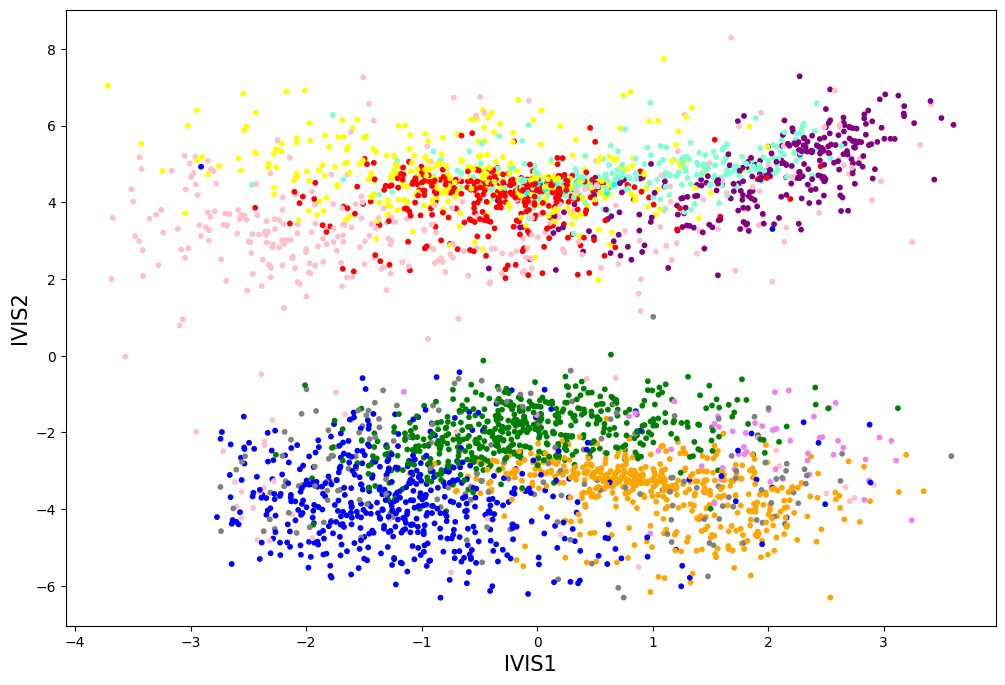

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_ivis[:,0],X_ivis[:,1],c=cs,s=10)
plt.xlabel("IVIS1", fontsize = 15)
plt.ylabel("IVIS2", fontsize = 15)
plt.savefig(dir+'Jurkat_IVIS.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [9]:
iteration = 10
score_ivis = []
res_kmeans_ivis = []
res_agglomerative_ivis = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    X_ivis = Ivis(verbose=0).fit_transform(X)
    dist_method = np.square(euclidean_distances(X_ivis, X_ivis)).flatten()
    score_ivis.append(DA.correlation(dist_orig, dist_method))
    res_kmeans_ivis.append(DA.kmeans(X_ivis, y))
    res_agglomerative_ivis.append(DA.Agglomerative(X_ivis, y))

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


In [10]:
result = pd.DataFrame(score_ivis,columns =['IVIS'])
result

,IVIS
0,0.250086
1,0.261957
2,0.257753
3,0.287752
4,0.244541
5,0.258471
6,0.257280
7,0.237267
8,0.248217
9,0.258281


In [11]:
pd.DataFrame(res_kmeans_ivis,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.330313,0.403292,0.509535,0.365606,0.862015
1,0.328432,0.401262,0.510908,0.380552,0.836015
2,0.348767,0.419329,0.512590,0.380386,0.841602
3,0.325300,0.398196,0.506249,0.382115,0.795869
4,0.319979,0.393585,0.506205,0.383417,0.828456
5,0.309285,0.384547,0.497931,0.374457,0.846621
6,0.314277,0.391277,0.496106,0.371794,0.857738
7,0.329408,0.402596,0.502182,0.381845,0.810094
8,0.342400,0.417286,0.507382,0.379470,0.834235
9,0.332508,0.405670,0.509285,0.353189,0.900619


In [12]:
pd.DataFrame(res_agglomerative_ivis,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.296500,0.378083,0.489365,0.316208,0.880413
1,0.338795,0.413127,0.511576,0.326151,0.874520
2,0.368676,0.441117,0.517238,0.315675,0.869009
3,0.304395,0.383906,0.491437,0.324694,0.869748
4,0.340344,0.415029,0.509054,0.328217,0.915846
5,0.317284,0.392346,0.482591,0.326169,0.866240
6,0.330789,0.407518,0.489470,0.303760,0.914981
7,0.362255,0.434090,0.500537,0.287144,1.018585
8,0.335224,0.412708,0.505160,0.362461,0.849080
9,0.322576,0.397811,0.492466,0.305317,0.987240
